# Implementasi K-Means Clustering menggunakan Python untuk Data Mining

# Read Dataset

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
dfmhs = pd.read_csv('nilaimahasiswa.csv',sep=';',engine='python')

In [24]:
dfmhs.describe()

,uts,uas
count,50.000000,50.000000
mean,56.220000,60.960000
std,27.316953,25.235996
min,12.000000,0.000000
25%,30.250000,45.000000
50%,55.000000,56.000000
75%,71.500000,81.000000
max,100.000000,100.000000


In [25]:
dfmhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Mahasiswa  50 non-null     object
 1   uts        50 non-null     int64 
 2   uas        50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


Text(0.5, 1.0, 'Grafik Nilai Mahasiswa')

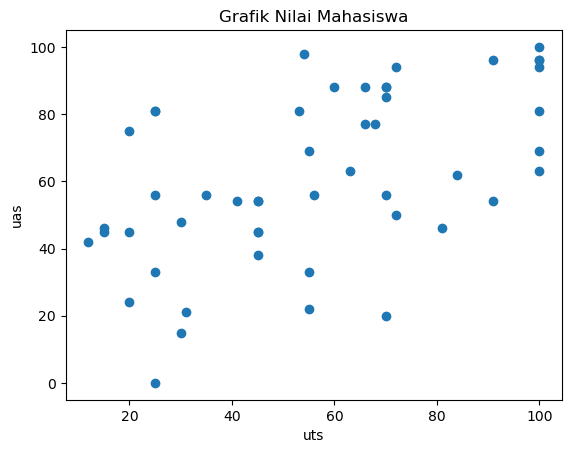

In [26]:
plt.scatter(dfmhs['uts'],dfmhs['uas'])
plt.xlabel("uts")
plt.ylabel("uas")
plt.title("Grafik Nilai Mahasiswa")

# Membuat Data Training

In [27]:
x_train = dfmhs[['uts','uas']].values

# Feature Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)

In [29]:
x_train

array([[0.03409091, 0.46      ],
       [0.61363636, 0.77      ],
       [0.14772727, 0.33      ],
       [0.46590909, 0.81      ],
       [0.09090909, 0.75      ],
       [1.        , 0.94      ],
       [0.48863636, 0.69      ],
       [0.14772727, 0.56      ],
       [0.14772727, 0.81      ],
       [0.20454545, 0.48      ],
       [0.03409091, 0.45      ],
       [0.78409091, 0.46      ],
       [0.63636364, 0.77      ],
       [0.68181818, 0.5       ],
       [0.5       , 0.56      ],
       [0.57954545, 0.63      ],
       [1.        , 0.69      ],
       [0.26136364, 0.56      ],
       [0.48863636, 0.33      ],
       [0.21590909, 0.21      ],
       [0.48863636, 0.22      ],
       [0.65909091, 0.85      ],
       [0.20454545, 0.15      ],
       [0.14772727, 0.81      ],
       [0.        , 0.42      ],
       [0.09090909, 0.24      ],
       [0.68181818, 0.94      ],
       [0.14772727, 0.        ],
       [0.89772727, 0.54      ],
       [0.54545455, 0.88      ],
       [0.

# Clustering

In [30]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2, n_init=10)
kmean

KMeans(n_clusters=2, n_init=10)

In [31]:
import os

os.environ['OMP_NUM_THREADS'] = '1'

y_cluster = kmean.fit_predict(x_train)

In [32]:
y_cluster

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1])

In [33]:
dfmhs['Cluster'] = y_cluster

In [34]:
dfmhs

,Mahasiswa,uts,uas,Cluster
0,AHMAD,15,46,0
1,ARFENDO,66,77,1
2,LATIFUDIN,25,33,0
3,HENDI,53,81,1
4,M. FERYAN,20,75,0
5,RENDI,100,94,1
6,NUREKA,55,69,1
7,INDRA,25,56,0
8,MOCH IDWAL,25,81,0
9,REYNO YUSUF,30,48,0


In [35]:
kmean.cluster_centers_

array([[0.25227273, 0.4356    ],
       [0.75272727, 0.7836    ]])

# Visualisasi Data Hasil Clustering

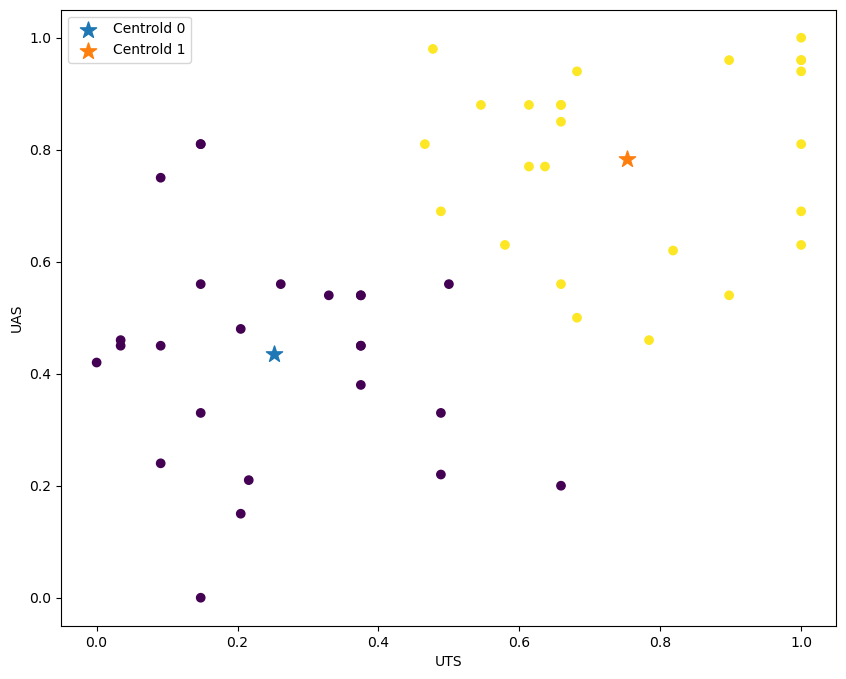

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(x_train[:,0],x_train[:,1],c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[0,0],kmean.cluster_centers_[0,1],marker='*',s=150,label='Centrold 0')
plt.scatter(kmean.cluster_centers_[1,0],kmean.cluster_centers_[1,1],marker='*',s=150,label='Centrold 1')
plt.xlabel("UTS")
plt.ylabel("UAS")
plt.legend()

# Mencari K (jumlah cluster) terbaik

In [37]:
inertias = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k, n_init=10).fit(x_train)
    inertias.append(km.inertia_)

In [38]:
inertias

[7.842257805785125,
 3.197773404958677,
 2.4267319466388484,
 1.7805326872026048,
 1.317021980601469,
 0.9758758143939394,
 0.761404892020858,
 0.5653348005214484,
 0.43037305194805214]

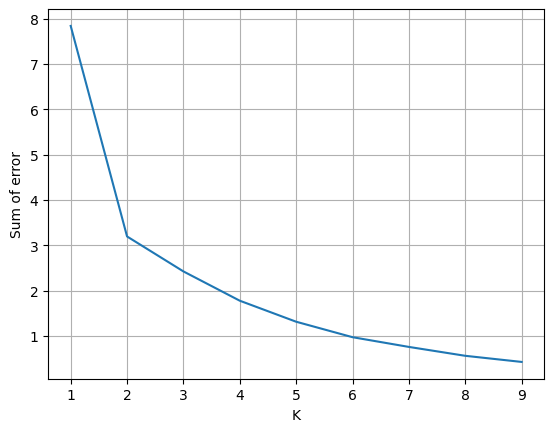

In [39]:
plt.xlabel("K")
plt.ylabel("Sum of error")
plt.plot(k_range,inertias)
plt.grid()

# Membuat Dataset Baru dengan label cluster

In [40]:
dfmhs['Cluster'] = dfmhs['Cluster'].replace([0,1],['Kurang','Baik'])

In [41]:
dfmhs

,Mahasiswa,uts,uas,Cluster
0,AHMAD,15,46,Kurang
1,ARFENDO,66,77,Baik
2,LATIFUDIN,25,33,Kurang
3,HENDI,53,81,Baik
4,M. FERYAN,20,75,Kurang
5,RENDI,100,94,Baik
6,NUREKA,55,69,Baik
7,INDRA,25,56,Kurang
8,MOCH IDWAL,25,81,Kurang
9,REYNO YUSUF,30,48,Kurang
